---
Title: "CITS 5508-Lab 02"
Author: "Ronjon Kundu (23215183)"
Date: "5/4/2023"

---

# Introduction
Data is given named training.csv and testing.csv. The training set (training.csv) contains 325 instances instances of multivariate remote sensing data of some forest areas in Japan. There are 4 different forest types labelled in the fifirst column (the column heading is ‘class’), as described in the link above. The test set (testing.csv) has the same format as training.csv and contains 198 test instances.

# Task 1: Read the files

In [176]:
import os
import tarfile
import pandas as pd

from six.moves import urllib

DATA_PATH = "D:/uwa/ML/assignment1/"
def load_train_data(data_path=DATA_PATH): # a function defined for load train data
 csv_path = os.path.join(data_path, "training.csv")
 return pd.read_csv(csv_path)
training = load_train_data()
training.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


tarining.csv file has 28 columns and 325 rows.

In [177]:
def load_test_data(data_path=DATA_PATH): # a function defined for load test data
 csv_path = os.path.join(data_path, "testing.csv")
 return pd.read_csv(csv_path)
testing = load_test_data()
testing.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


like tarining.csv file testing.csv file has 28 columns and 198 rows.

# Task 2 Drop the columns start with the 'pred_minus_obs' string of training dataset

In [178]:
df_training_b1tob9withclass = training[training.columns.drop(list(training.filter(regex='pred_minus_obs')))]
df_training_b1tob9withclass.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


# Task 3: display (visualise) the different features (or attributes/columns)

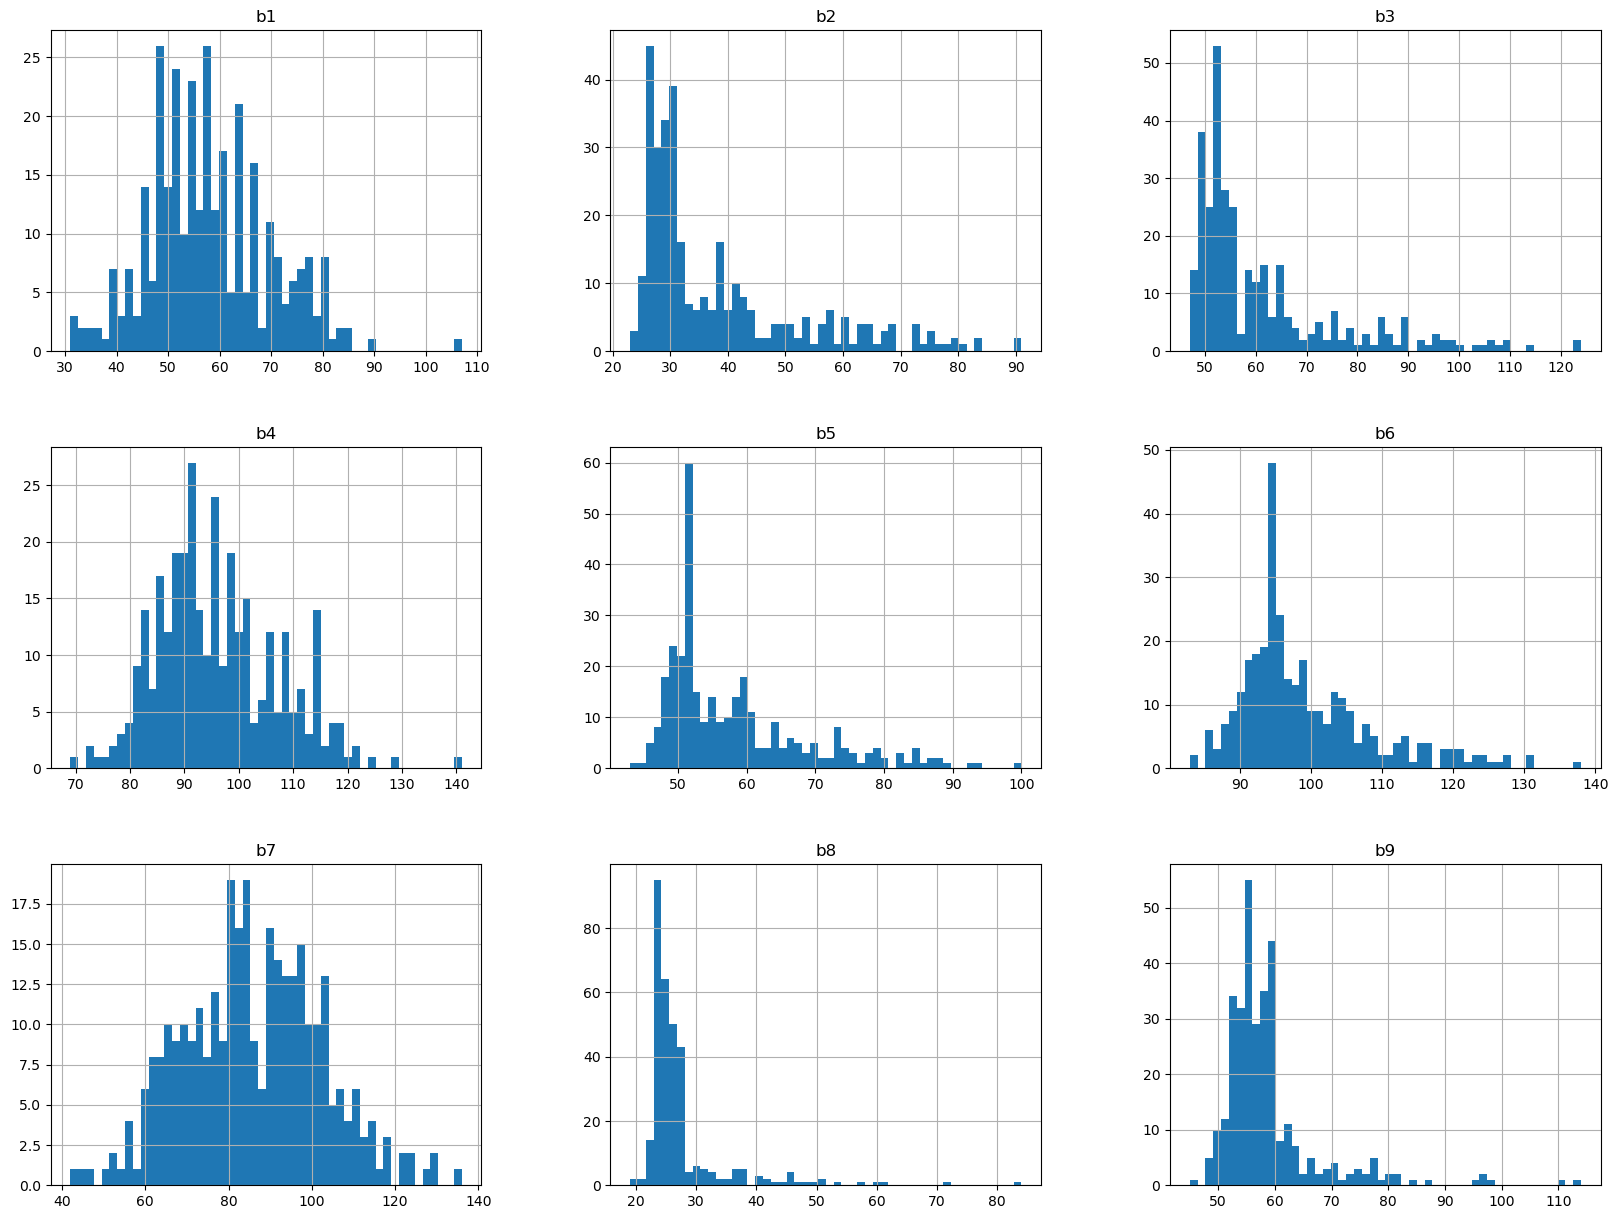

In [179]:
%matplotlib inline 
import matplotlib.pyplot as plt
df_training_b1tob9withclass.hist(bins=50, figsize=(20,15))
plt.show()

The plot b1 and b4 evenly distributed with the highest value is just over 25.The plot b7 evenly distributed with the highest value is about 20. All the variables are righ skewed except b7. Though b8 and b9 are highly right skewed.

# Task 4: Python code to count the number of instances for each class label

In [180]:
df_training_b1tob9withclass['class'].value_counts()

s    136
d    105
o     46
h     38
Name: class, dtype: int64

It shows that training data set is not evenly distributed. The 'o' and 'h' class have only few instances near 40 where as the other two classes have more than 100 instances.

# Task 5: Perform an appropriate feature scaling

In [181]:
df_training_b1tob9 = df_training_b1tob9withclass.drop("class", axis=1) # drop class column
df_training_b1tob9

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,67,51,68,115,69,111,136,31,67
1,67,28,51,99,50,97,82,26,59
2,63,26,50,95,49,91,81,26,57
3,63,42,63,97,66,108,111,28,59
4,46,27,50,83,51,90,76,26,56
...,...,...,...,...,...,...,...,...,...
320,55,56,72,91,79,113,86,35,68
321,69,49,76,91,52,91,92,25,57
322,49,26,48,107,59,104,62,22,53
323,55,26,52,92,55,98,65,23,56


In [182]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # applying standard scaler to training dataset
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
df_training_b1tob9_scaled = num_pipeline.fit_transform(df_training_b1tob9)

In [183]:
df_training_b1tob9_scaleddf = pd.DataFrame(df_training_b1tob9_scaled, columns=df_training_b1tob9.columns)
df_training_b1tob9_scaleddf

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,0.768240,0.866233,0.436060,1.695451,1.024724,1.252415,3.017089,0.487582,0.915332
1,0.768240,-0.712673,-0.698765,0.254401,-0.761240,-0.233114,-0.232568,-0.185016,0.013527
2,0.425981,-0.849969,-0.765519,-0.105862,-0.855238,-0.869769,-0.292747,-0.185016,-0.211924
3,0.425981,0.248400,0.102288,0.074270,0.742729,0.934087,1.512618,0.084023,0.013527
4,-1.028620,-0.781321,-0.765519,-1.186649,-0.667242,-0.975878,-0.593641,-0.185016,-0.324650
...,...,...,...,...,...,...,...,...,...
320,-0.258537,1.209473,0.703078,-0.466124,1.964705,1.464633,0.008147,1.025661,1.028058
321,0.939369,0.728937,0.970096,-0.466124,-0.573244,-0.869769,0.369220,-0.319536,-0.211924
322,-0.771926,-0.849969,-0.899028,0.974926,0.084743,0.509651,-1.436145,-0.723095,-0.662827
323,-0.258537,-0.849969,-0.632010,-0.376059,-0.291249,-0.127005,-1.255608,-0.588576,-0.324650


In [184]:
df_training_b1tob9withclass['class']

0      d
1      s
2      s
3      d
4      s
      ..
320    o
321    d
322    s
323    s
324    h
Name: class, Length: 325, dtype: object

In [185]:
# concat the class column again
result_df_train = pd.concat([df_training_b1tob9_scaleddf, df_training_b1tob9withclass['class']], axis=1, join='inner') 
display(result_df_train)

,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,0.768240,0.866233,0.436060,1.695451,1.024724,1.252415,3.017089,0.487582,0.915332,d
1,0.768240,-0.712673,-0.698765,0.254401,-0.761240,-0.233114,-0.232568,-0.185016,0.013527,s
2,0.425981,-0.849969,-0.765519,-0.105862,-0.855238,-0.869769,-0.292747,-0.185016,-0.211924,s
3,0.425981,0.248400,0.102288,0.074270,0.742729,0.934087,1.512618,0.084023,0.013527,d
4,-1.028620,-0.781321,-0.765519,-1.186649,-0.667242,-0.975878,-0.593641,-0.185016,-0.324650,s
...,...,...,...,...,...,...,...,...,...,...
320,-0.258537,1.209473,0.703078,-0.466124,1.964705,1.464633,0.008147,1.025661,1.028058,o
321,0.939369,0.728937,0.970096,-0.466124,-0.573244,-0.869769,0.369220,-0.319536,-0.211924,d
322,-0.771926,-0.849969,-0.899028,0.974926,0.084743,0.509651,-1.436145,-0.723095,-0.662827,s
323,-0.258537,-0.849969,-0.632010,-0.376059,-0.291249,-0.127005,-1.255608,-0.588576,-0.324650,s


# Tasks done on test dataset

In [186]:
df_testing_b1tob9withclass = testing[testing.columns.drop(list(testing.filter(regex='pred_minus_obs')))]
df_testing_b1tob9withclass.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59


In [187]:
df_testing_b1tob9 = df_testing_b1tob9withclass.drop("class", axis=1)
df_testing_b1tob9

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,39,36,57,91,59,101,93,27,60
1,84,30,57,112,51,98,92,26,62
2,53,25,49,99,51,93,84,26,58
3,59,26,49,103,47,92,82,25,56
4,57,49,66,103,64,106,114,28,59
...,...,...,...,...,...,...,...,...,...
193,55,61,90,75,55,91,84,24,54
194,66,69,93,90,63,100,99,25,57
195,79,30,55,115,51,96,109,25,59
196,69,27,53,106,47,90,87,24,55


In [188]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
df_testing_b1tob9_scaled = num_pipeline.fit_transform(df_testing_b1tob9)
df_testing_b1tob9_scaled

array([[-1.8787969 , -0.28223274, -0.3865936 , ...,  0.15428138,
        -0.18893459, -0.11433257],
       [ 1.6513761 , -0.61954914, -0.3865936 , ...,  0.08997041,
        -0.3006034 ,  0.09053484],
       [-0.78052085, -0.90064614, -0.84980409, ..., -0.4245174 ,
        -0.3006034 , -0.31919997],
       ...,
       [ 1.25913466, -0.61954914, -0.50239623, ...,  1.18325699,
        -0.4122722 , -0.21676627],
       [ 0.47465177, -0.78820734, -0.61819885, ..., -0.23158447,
        -0.523941  , -0.62650107],
       [ 1.33758295, -0.67576854, -0.50239623, ...,  0.73308016,
        -0.4122722 , -0.21676627]])

In [189]:
df_testing_b1tob9_scaleddf = pd.DataFrame(df_testing_b1tob9_scaled, columns=df_testing_b1tob9.columns)
df_testing_b1tob9_scaleddf

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,-1.878797,-0.282233,-0.386594,-0.704879,0.021654,0.031221,0.154281,-0.188935,-0.114333
1,1.651376,-0.619549,-0.386594,0.717192,-0.625526,-0.237548,0.089970,-0.300603,0.090535
2,-0.780521,-0.900646,-0.849804,-0.163138,-0.625526,-0.685496,-0.424517,-0.300603,-0.319200
3,-0.309831,-0.844427,-0.849804,0.107733,-0.949116,-0.775085,-0.553139,-0.412272,-0.524067
4,-0.466728,0.448619,0.134518,0.107733,0.426142,0.479168,1.504812,-0.077266,-0.216766
...,...,...,...,...,...,...,...,...,...
193,-0.623624,1.123252,1.524150,-1.788362,-0.301936,-0.864675,-0.424517,-0.523941,-0.728935
194,0.239307,1.573007,1.697854,-0.772597,0.345245,-0.058369,0.540147,-0.412272,-0.421634
195,1.259135,-0.619549,-0.502396,0.920345,-0.625526,-0.416727,1.183257,-0.412272,-0.216766
196,0.474652,-0.788207,-0.618199,0.310886,-0.949116,-0.954264,-0.231584,-0.523941,-0.626501


In [190]:
result_df_test = pd.concat([df_testing_b1tob9_scaleddf, df_testing_b1tob9withclass['class']], axis=1, join='inner')
display(result_df_test)

,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,-1.878797,-0.282233,-0.386594,-0.704879,0.021654,0.031221,0.154281,-0.188935,-0.114333,d
1,1.651376,-0.619549,-0.386594,0.717192,-0.625526,-0.237548,0.089970,-0.300603,0.090535,h
2,-0.780521,-0.900646,-0.849804,-0.163138,-0.625526,-0.685496,-0.424517,-0.300603,-0.319200,s
3,-0.309831,-0.844427,-0.849804,0.107733,-0.949116,-0.775085,-0.553139,-0.412272,-0.524067,s
4,-0.466728,0.448619,0.134518,0.107733,0.426142,0.479168,1.504812,-0.077266,-0.216766,d
...,...,...,...,...,...,...,...,...,...,...
193,-0.623624,1.123252,1.524150,-1.788362,-0.301936,-0.864675,-0.424517,-0.523941,-0.728935,d
194,0.239307,1.573007,1.697854,-0.772597,0.345245,-0.058369,0.540147,-0.412272,-0.421634,d
195,1.259135,-0.619549,-0.502396,0.920345,-0.625526,-0.416727,1.183257,-0.412272,-0.216766,h
196,0.474652,-0.788207,-0.618199,0.310886,-0.949116,-0.954264,-0.231584,-0.523941,-0.626501,h


# Task 6: Logistic Regression Classifier implemented for only two classes

In [191]:
# select only two classes from dataset
df_final_6=result_df_train.loc[(result_df_train['class'] == 's') | (result_df_train['class'] == 'd')]
df_final_6

,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,0.768240,0.866233,0.436060,1.695451,1.024724,1.252415,3.017089,0.487582,0.915332,d
1,0.768240,-0.712673,-0.698765,0.254401,-0.761240,-0.233114,-0.232568,-0.185016,0.013527,s
2,0.425981,-0.849969,-0.765519,-0.105862,-0.855238,-0.869769,-0.292747,-0.185016,-0.211924,s
3,0.425981,0.248400,0.102288,0.074270,0.742729,0.934087,1.512618,0.084023,0.013527,d
4,-1.028620,-0.781321,-0.765519,-1.186649,-0.667242,-0.975878,-0.593641,-0.185016,-0.324650,s
...,...,...,...,...,...,...,...,...,...,...
316,0.083722,-0.438080,-0.364993,-0.556190,-0.761240,-0.975878,-0.052032,-0.319536,-0.324650,s
318,-0.771926,-0.918617,-0.765519,-0.376059,-0.385248,0.085214,-1.556502,-0.588576,-0.775552,s
321,0.939369,0.728937,0.970096,-0.466124,-0.573244,-0.869769,0.369220,-0.319536,-0.211924,d
322,-0.771926,-0.849969,-0.899028,0.974926,0.084743,0.509651,-1.436145,-0.723095,-0.662827,s


In [192]:
df_final_6_b1tob9 = df_final_6.drop("class", axis=1)
df_final_6_b1tob9

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,0.768240,0.866233,0.436060,1.695451,1.024724,1.252415,3.017089,0.487582,0.915332
1,0.768240,-0.712673,-0.698765,0.254401,-0.761240,-0.233114,-0.232568,-0.185016,0.013527
2,0.425981,-0.849969,-0.765519,-0.105862,-0.855238,-0.869769,-0.292747,-0.185016,-0.211924
3,0.425981,0.248400,0.102288,0.074270,0.742729,0.934087,1.512618,0.084023,0.013527
4,-1.028620,-0.781321,-0.765519,-1.186649,-0.667242,-0.975878,-0.593641,-0.185016,-0.324650
...,...,...,...,...,...,...,...,...,...
316,0.083722,-0.438080,-0.364993,-0.556190,-0.761240,-0.975878,-0.052032,-0.319536,-0.324650
318,-0.771926,-0.918617,-0.765519,-0.376059,-0.385248,0.085214,-1.556502,-0.588576,-0.775552
321,0.939369,0.728937,0.970096,-0.466124,-0.573244,-0.869769,0.369220,-0.319536,-0.211924
322,-0.771926,-0.849969,-0.899028,0.974926,0.084743,0.509651,-1.436145,-0.723095,-0.662827


In [193]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
df_final_6_b1tob9scaled = num_pipeline.fit_transform(df_final_6_b1tob9)
df_final_6_b1tob9scaled

array([[ 1.30979958,  1.38587426,  0.86459558, ...,  3.37311371,
         2.52453686,  2.9363371 ],
       [ 1.30979958, -0.68304602, -0.64983285, ..., -0.10090511,
         0.3407128 ,  0.79759213],
       [ 0.8809114 , -0.86295214, -0.73891687, ..., -0.16523879,
         0.3407128 ,  0.26290589],
       ...,
       [ 1.52424366,  1.20596814,  1.57726778, ...,  0.54243171,
        -0.09605201,  0.26290589],
       [-0.62019722, -0.86295214, -0.91708492, ..., -1.38757875,
        -1.40634645, -0.80646659],
       [ 0.02313505, -0.86295214, -0.56074882, ..., -1.1945777 ,
        -0.96958164, -0.00443723]])

In [194]:
df_final_6_b1tob9scaleddf = pd.DataFrame(df_final_6_b1tob9scaled, columns=df_final_6_b1tob9.columns)
df_final_6_b1tob9scaleddf

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,1.309800,1.385874,0.864596,2.362836,1.842379,2.185241,3.373114,2.524537,2.936337
1,1.309800,-0.683046,-0.649833,0.574593,-0.816384,0.012237,-0.100905,0.340713,0.797592
2,0.880911,-0.862952,-0.738917,0.127533,-0.956319,-0.919051,-0.165239,0.340713,0.262906
3,0.880911,0.576297,0.419175,0.351063,1.422575,1.719597,1.764772,1.214242,0.797592
4,-0.941863,-0.772999,-0.738917,-1.213649,-0.676449,-1.074265,-0.486907,0.340713,-0.004437
...,...,...,...,...,...,...,...,...,...
236,0.452023,-0.323234,-0.204413,-0.431293,-0.816384,-1.074265,0.092096,-0.096052,-0.004437
237,-0.620197,-0.952905,-0.738917,-0.207763,-0.256644,0.477881,-1.516246,-0.969582,-1.073810
238,1.524244,1.205968,1.577268,-0.319528,-0.536514,-0.919051,0.542432,-0.096052,0.262906
239,-0.620197,-0.862952,-0.917085,1.468714,0.443030,1.098739,-1.387579,-1.406346,-0.806467


In [195]:
df_lebels = df_final_6.drop(['b1','b2','b3','b4','b5','b6','b7','b8','b9'], axis=1)
df_lebels

,class
0,d
1,s
2,s
3,d
4,s
...,...
316,s
318,s
321,d
322,s


In [196]:
df_lebels.reset_index(drop=True, inplace = True) 
df_lebels

,class
0,d
1,s
2,s
3,d
4,s
...,...
236,s
237,s
238,d
239,s


In [197]:
df_final_6_b1tob9scaleddfwithclass = pd.concat([df_final_6_b1tob9scaleddf, df_lebels['class']], axis=1)
display(df_final_6_b1tob9scaleddfwithclass)

,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,1.309800,1.385874,0.864596,2.362836,1.842379,2.185241,3.373114,2.524537,2.936337,d
1,1.309800,-0.683046,-0.649833,0.574593,-0.816384,0.012237,-0.100905,0.340713,0.797592,s
2,0.880911,-0.862952,-0.738917,0.127533,-0.956319,-0.919051,-0.165239,0.340713,0.262906,s
3,0.880911,0.576297,0.419175,0.351063,1.422575,1.719597,1.764772,1.214242,0.797592,d
4,-0.941863,-0.772999,-0.738917,-1.213649,-0.676449,-1.074265,-0.486907,0.340713,-0.004437,s
...,...,...,...,...,...,...,...,...,...,...
236,0.452023,-0.323234,-0.204413,-0.431293,-0.816384,-1.074265,0.092096,-0.096052,-0.004437,s
237,-0.620197,-0.952905,-0.738917,-0.207763,-0.256644,0.477881,-1.516246,-0.969582,-1.073810,s
238,1.524244,1.205968,1.577268,-0.319528,-0.536514,-0.919051,0.542432,-0.096052,0.262906,d
239,-0.620197,-0.862952,-0.917085,1.468714,0.443030,1.098739,-1.387579,-1.406346,-0.806467,s


In [198]:
df_final_6_b1tob9scaleddfwithclass.shape

(241, 10)

In [199]:
df_final_6_b1tob9scaleddfwithclass['class'].replace(['s', 'd'],
                        [0,1], inplace=True) # changed the text to numerical
df_final_6_b1tob9scaleddfwithclass

,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,1.309800,1.385874,0.864596,2.362836,1.842379,2.185241,3.373114,2.524537,2.936337,1
1,1.309800,-0.683046,-0.649833,0.574593,-0.816384,0.012237,-0.100905,0.340713,0.797592,0
2,0.880911,-0.862952,-0.738917,0.127533,-0.956319,-0.919051,-0.165239,0.340713,0.262906,0
3,0.880911,0.576297,0.419175,0.351063,1.422575,1.719597,1.764772,1.214242,0.797592,1
4,-0.941863,-0.772999,-0.738917,-1.213649,-0.676449,-1.074265,-0.486907,0.340713,-0.004437,0
...,...,...,...,...,...,...,...,...,...,...
236,0.452023,-0.323234,-0.204413,-0.431293,-0.816384,-1.074265,0.092096,-0.096052,-0.004437,0
237,-0.620197,-0.952905,-0.738917,-0.207763,-0.256644,0.477881,-1.516246,-0.969582,-1.073810,0
238,1.524244,1.205968,1.577268,-0.319528,-0.536514,-0.919051,0.542432,-0.096052,0.262906,1
239,-0.620197,-0.862952,-0.917085,1.468714,0.443030,1.098739,-1.387579,-1.406346,-0.806467,0


In [200]:
from sklearn.model_selection import train_test_split
import numpy as np
features = df_final_6_b1tob9scaleddfwithclass.drop(['class'], axis=1)
labels = df_final_6_b1tob9scaleddfwithclass.drop(['b1','b2','b3','b4','b5','b6','b7','b8','b9'], axis=1)

trainX, testX, trainY, testY = train_test_split(features, labels, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs",random_state=42)
log_reg.fit(trainX, trainY)

C:\cits5508-2023\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [201]:
accuracy = log_reg.score(testX, testY)
print('Accuracy:', accuracy)

Accuracy: 0.9387755102040817


# Task 7(a): Logistic Regression Classifier considering two individual features

In [202]:
feature_b3 = features['b3']
classes_sd = df_final_6_b1tob9scaleddfwithclass["class"]

In [203]:
X_b3=feature_b3.values.reshape(-1,1)

In [204]:
y=np.array(classes_sd)

In [205]:
from sklearn.linear_model import LogisticRegression
log_reg_b3 = LogisticRegression(solver="lbfgs", random_state=42)
log_reg_b3.fit(X_b3, y)

LogisticRegression(random_state=42)

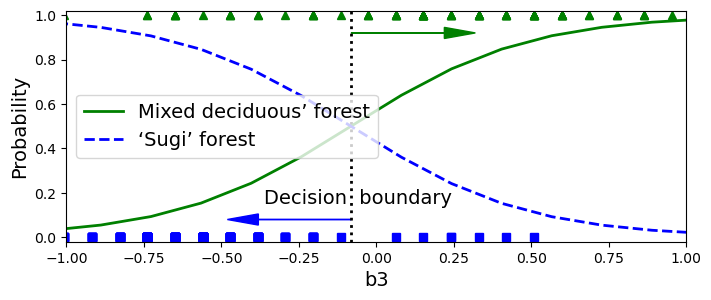

In [206]:
X_new = np.linspace(-8, 8, 100).reshape(-1, 1)
y_proba = log_reg_b3.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]#[0,0]

plt.figure(figsize=(8, 3))
plt.plot(X_b3[y==0], y[y==0], "bs")
plt.plot(X_b3[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Mixed deciduous’ forest")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="‘Sugi’ forest")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("b3", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([-1, 1, -0.02, 1.02])

plt.show()

In [207]:
feature_b5 = features['b5']
classes_sd = df_final_6_b1tob9scaleddfwithclass["class"]

In [208]:
X_b5=feature_b5.values.reshape(-1,1)

In [209]:
y=np.array(classes_sd)

In [210]:
log_reg_b5 = LogisticRegression(solver="lbfgs", random_state=42)
log_reg_b5.fit(X_b5, y)

LogisticRegression(random_state=42)

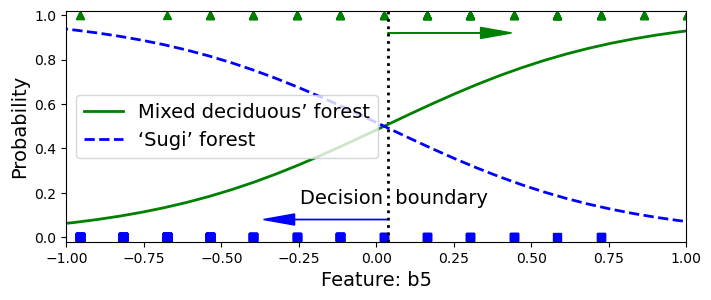

In [211]:
X_new = np.linspace(-36, 36, 1000).reshape(-1, 1)
y_proba = log_reg_b5.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]

plt.figure(figsize=(8, 3))
plt.plot(X_b5[y==0], y[y==0], "bs")
plt.plot(X_b5[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Mixed deciduous’ forest")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="‘Sugi’ forest")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Feature: b5", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([-1, 1, -0.02, 1.02])

plt.show()

# Task 7(b): Logistic Regression Classifier considering all features

In [212]:
feature_all = features
classes_sd = df_final_6_b1tob9scaleddfwithclass["class"]

In [213]:
X_all=feature_all.values

In [214]:
y=np.array(classes_sd)

In [215]:
log_reg_all = LogisticRegression(solver="lbfgs", random_state=42)
log_reg_all.fit(feature_all, y)

LogisticRegression(random_state=42)

In [216]:
ID_10 = np.random.choice(len(X_all),size = 10, replace=False) # selecting 10 random samples
x_test_sample = X_all[ID_10, :]
y_test_sample = y[ID_10]

C:\cits5508-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\cits5508-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\cits5508-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


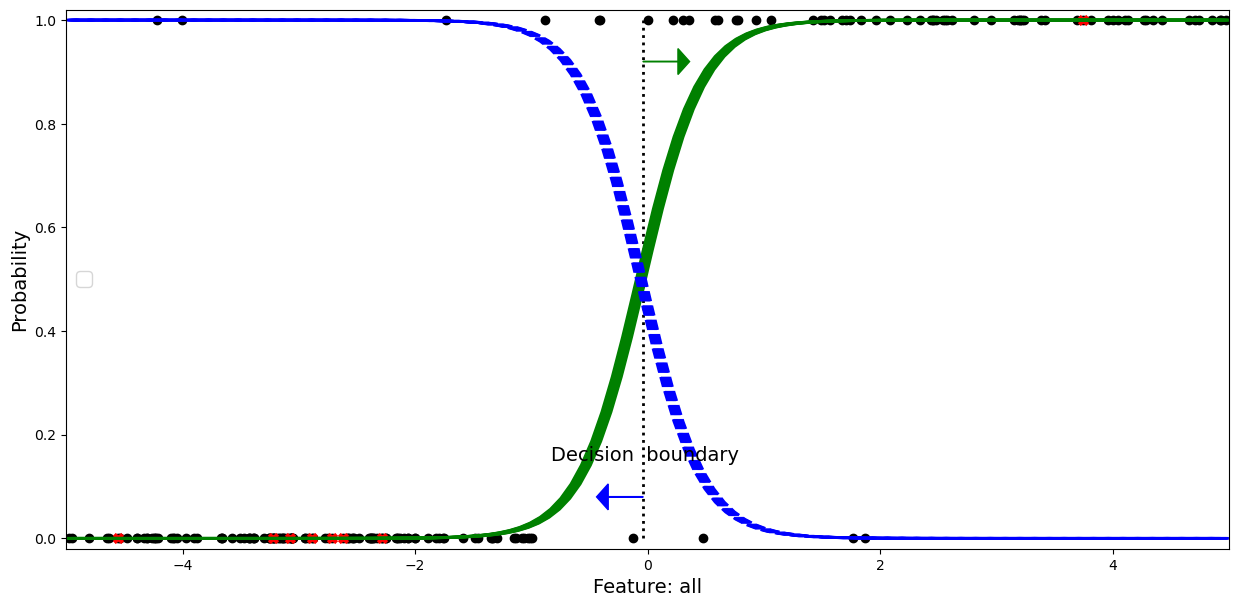

In [218]:

X_new = np.linspace(-5, 5, 1017).reshape(-1, 9)
y_proba = log_reg_all.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]

plt.figure(figsize=(15, 7))

plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2)
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Feature: all", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([-5, 5, -0.02, 1.02])
x_score = log_reg_all.decision_function(X_all)
plt.scatter(x_score,y,color='black')
plt.scatter(log_reg_all.decision_function(x_test_sample),y_test_sample,color='red',marker='x',linewidth=3)

plt.show()

The samples selected are shown in the above figure using red 'X' markers. The black dots are the original data plotted.

# Task 8: Plot precision versus recall and comments on the results

In [219]:
from sklearn.metrics import precision_recall_curve
X = features
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [220]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)

C:\cits5508-2023\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [221]:
y_prob_train = log_reg.predict_proba(X_train)[:,1]
y_prob_test = log_reg.predict_proba(X_test)[:,1]

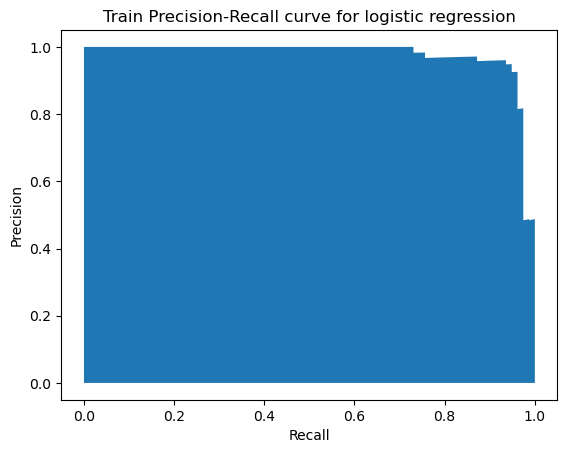

In [222]:
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve for logistic regression");

From the above plot threshold value is chosen at 0.95, here the model achieves the best balance between precision and recall. At this threshold point the model performs better.

# Task 9: k-nearest neighbours (k-NN) algorithm

In [223]:
X = df_final_6_b1tob9scaleddfwithclass.iloc[:, :-1].values
y = df_final_6_b1tob9scaleddfwithclass.iloc[:, 9].values

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [226]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 1)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [227]:
y_pred = classifier1.predict(X_test)

In [228]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  1]
 [ 2 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.93      0.88      0.90        16

    accuracy                           0.94        49
   macro avg       0.94      0.92      0.93        49
weighted avg       0.94      0.94      0.94        49

Accuracy: 0.9387755102040817


In [229]:
classifier2 = KNeighborsClassifier(n_neighbors = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [230]:
y_pred = classifier2.predict(X_test)

In [231]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  1]
 [ 3 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.93      0.81      0.87        16

    accuracy                           0.92        49
   macro avg       0.92      0.89      0.90        49
weighted avg       0.92      0.92      0.92        49

Accuracy: 0.9183673469387755


In [232]:
classifier3 = KNeighborsClassifier(n_neighbors = 3)
classifier3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [233]:
y_pred = classifier3.predict(X_test)

In [234]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  1]
 [ 1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.94      0.94      0.94        16

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49

Accuracy: 0.9591836734693877


In [235]:
classifier4 = KNeighborsClassifier(n_neighbors = 4)
classifier4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [236]:
y_pred = classifier4.predict(X_test)

In [237]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  1]
 [ 2 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.93      0.88      0.90        16

    accuracy                           0.94        49
   macro avg       0.94      0.92      0.93        49
weighted avg       0.94      0.94      0.94        49

Accuracy: 0.9387755102040817


In [238]:
classifier5 = KNeighborsClassifier(n_neighbors = 5)
classifier5.fit(X_train, y_train)

KNeighborsClassifier()

In [239]:
y_pred = classifier5.predict(X_test)

In [240]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  1]
 [ 2 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.93      0.88      0.90        16

    accuracy                           0.94        49
   macro avg       0.94      0.92      0.93        49
weighted avg       0.94      0.94      0.94        49

Accuracy: 0.9387755102040817


In [241]:
classifier6 = KNeighborsClassifier(n_neighbors = 6)
classifier6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [242]:
y_pred = classifier6.predict(X_test)

In [243]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  1]
 [ 2 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.93      0.88      0.90        16

    accuracy                           0.94        49
   macro avg       0.94      0.92      0.93        49
weighted avg       0.94      0.94      0.94        49

Accuracy: 0.9387755102040817


In [244]:
classifier7 = KNeighborsClassifier(n_neighbors = 7)
classifier7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [245]:
y_pred = classifier6.predict(X_test)

In [246]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  1]
 [ 2 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.93      0.88      0.90        16

    accuracy                           0.94        49
   macro avg       0.94      0.92      0.93        49
weighted avg       0.94      0.94      0.94        49

Accuracy: 0.9387755102040817


classifier5 with k=5 is chosen depending on the Confusion Matrix:
[[32  1]
 [ 2 14]]

# Task 10: Compare the performances of the two classifiers (Logistic Regression and k-NN)

In [247]:
result_df_test

,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,-1.878797,-0.282233,-0.386594,-0.704879,0.021654,0.031221,0.154281,-0.188935,-0.114333,d
1,1.651376,-0.619549,-0.386594,0.717192,-0.625526,-0.237548,0.089970,-0.300603,0.090535,h
2,-0.780521,-0.900646,-0.849804,-0.163138,-0.625526,-0.685496,-0.424517,-0.300603,-0.319200,s
3,-0.309831,-0.844427,-0.849804,0.107733,-0.949116,-0.775085,-0.553139,-0.412272,-0.524067,s
4,-0.466728,0.448619,0.134518,0.107733,0.426142,0.479168,1.504812,-0.077266,-0.216766,d
...,...,...,...,...,...,...,...,...,...,...
193,-0.623624,1.123252,1.524150,-1.788362,-0.301936,-0.864675,-0.424517,-0.523941,-0.728935,d
194,0.239307,1.573007,1.697854,-0.772597,0.345245,-0.058369,0.540147,-0.412272,-0.421634,d
195,1.259135,-0.619549,-0.502396,0.920345,-0.625526,-0.416727,1.183257,-0.412272,-0.216766,h
196,0.474652,-0.788207,-0.618199,0.310886,-0.949116,-0.954264,-0.231584,-0.523941,-0.626501,h


In [248]:
df_test_sdonly=result_df_test.loc[(result_df_test['class'] == 's') | (result_df_test['class'] == 'd')]
df_test_sdonly

,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,-1.878797,-0.282233,-0.386594,-0.704879,0.021654,0.031221,0.154281,-0.188935,-0.114333,d
2,-0.780521,-0.900646,-0.849804,-0.163138,-0.625526,-0.685496,-0.424517,-0.300603,-0.319200,s
3,-0.309831,-0.844427,-0.849804,0.107733,-0.949116,-0.775085,-0.553139,-0.412272,-0.524067,s
4,-0.466728,0.448619,0.134518,0.107733,0.426142,0.479168,1.504812,-0.077266,-0.216766,d
6,-0.545176,-0.675769,-0.791903,-0.569444,-0.625526,-0.595906,-0.874694,-0.300603,-0.319200,s
...,...,...,...,...,...,...,...,...,...,...
189,-0.074486,-0.731988,-0.734001,-0.366291,-1.030014,-1.043854,-0.231584,-0.523941,-0.524067,s
190,-0.545176,-0.788207,-0.734001,-0.569444,0.102552,0.031221,-1.260560,-0.523941,-0.626501,s
191,-0.388279,-0.900646,-0.907705,-0.230856,-1.030014,-1.043854,-1.131938,-0.747279,-0.831368,s
193,-0.623624,1.123252,1.524150,-1.788362,-0.301936,-0.864675,-0.424517,-0.523941,-0.728935,d


In [249]:
df_test_sdonly['class'].replace(['s', 'd'],
                        [0,1], inplace=True)
df_test_sdonly

C:\Users\HP\AppData\Local\Temp\ipykernel_12064\3685496142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_sdonly['class'].replace(['s', 'd'],


,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,-1.878797,-0.282233,-0.386594,-0.704879,0.021654,0.031221,0.154281,-0.188935,-0.114333,1
2,-0.780521,-0.900646,-0.849804,-0.163138,-0.625526,-0.685496,-0.424517,-0.300603,-0.319200,0
3,-0.309831,-0.844427,-0.849804,0.107733,-0.949116,-0.775085,-0.553139,-0.412272,-0.524067,0
4,-0.466728,0.448619,0.134518,0.107733,0.426142,0.479168,1.504812,-0.077266,-0.216766,1
6,-0.545176,-0.675769,-0.791903,-0.569444,-0.625526,-0.595906,-0.874694,-0.300603,-0.319200,0
...,...,...,...,...,...,...,...,...,...,...
189,-0.074486,-0.731988,-0.734001,-0.366291,-1.030014,-1.043854,-0.231584,-0.523941,-0.524067,0
190,-0.545176,-0.788207,-0.734001,-0.569444,0.102552,0.031221,-1.260560,-0.523941,-0.626501,0
191,-0.388279,-0.900646,-0.907705,-0.230856,-1.030014,-1.043854,-1.131938,-0.747279,-0.831368,0
193,-0.623624,1.123252,1.524150,-1.788362,-0.301936,-0.864675,-0.424517,-0.523941,-0.728935,1


In [250]:
features_test = df_test_sdonly.drop(['class'], axis=1)
features_test

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,-1.878797,-0.282233,-0.386594,-0.704879,0.021654,0.031221,0.154281,-0.188935,-0.114333
2,-0.780521,-0.900646,-0.849804,-0.163138,-0.625526,-0.685496,-0.424517,-0.300603,-0.319200
3,-0.309831,-0.844427,-0.849804,0.107733,-0.949116,-0.775085,-0.553139,-0.412272,-0.524067
4,-0.466728,0.448619,0.134518,0.107733,0.426142,0.479168,1.504812,-0.077266,-0.216766
6,-0.545176,-0.675769,-0.791903,-0.569444,-0.625526,-0.595906,-0.874694,-0.300603,-0.319200
...,...,...,...,...,...,...,...,...,...
189,-0.074486,-0.731988,-0.734001,-0.366291,-1.030014,-1.043854,-0.231584,-0.523941,-0.524067
190,-0.545176,-0.788207,-0.734001,-0.569444,0.102552,0.031221,-1.260560,-0.523941,-0.626501
191,-0.388279,-0.900646,-0.907705,-0.230856,-1.030014,-1.043854,-1.131938,-0.747279,-0.831368
193,-0.623624,1.123252,1.524150,-1.788362,-0.301936,-0.864675,-0.424517,-0.523941,-0.728935


In [251]:
labels_test = df_test_sdonly.drop(['b1','b2','b3','b4','b5','b6','b7','b8','b9'], axis=1)
labels_test

,class
0,1
2,0
3,0
4,1
6,0
...,...
189,0
190,0
191,0
193,1


In [252]:
y_pred = log_reg.predict(features_test.values)

# Generate the confusion matrix
cm = confusion_matrix(labels_test.values, y_pred)
print(cm)

[[59  0]
 [ 1 53]]


C:\cits5508-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [253]:
y_pred_knn = classifier5.predict(features_test.values)

# Generate the confusion matrix
cm = confusion_matrix(labels_test.values, y_pred_knn)
print(cm)

[[59  0]
 [ 0 54]]


In [254]:
y_pred_log = log_reg.predict(features_test.values)

# Calculate the accuracy of the model
accuracy = accuracy_score(labels_test.values, y_pred_log)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.99


C:\cits5508-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [255]:
y_pred_knn = classifier5.predict(features_test.values)

# Calculate the accuracy of the model
accuracy = accuracy_score(labels_test.values, y_pred_knn)
print("Accuracy: %.2f" % accuracy)

Accuracy: 1.00


C:\cits5508-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


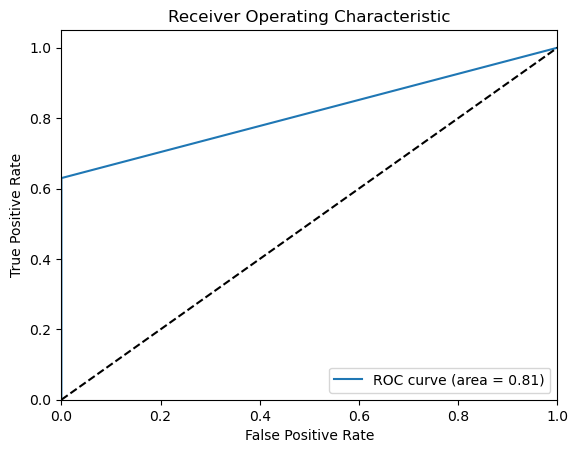

In [256]:
from sklearn.metrics import roc_curve, auc
threshold = 0.95
y_pred_proba_log = log_reg.predict_proba(features_test.values)[:,1]>=threshold

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(labels_test.values, y_pred_proba_log)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

For logistic regression here threshold value 0.95 is used.

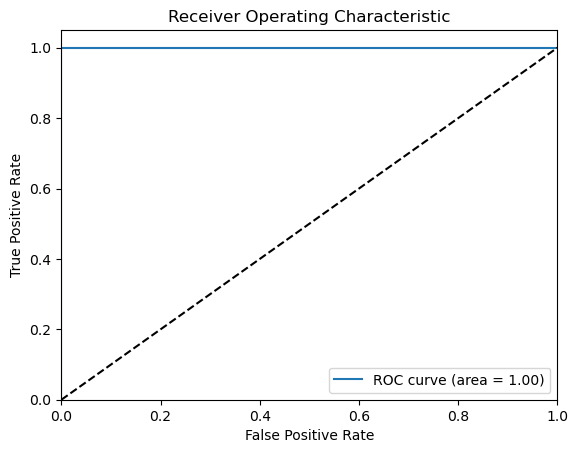

In [257]:
from sklearn.metrics import roc_curve, auc

y_pred_proba_knn = classifier5.predict_proba(features_test.values)[:,1]

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(labels_test.values, y_pred_proba_knn)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Using the confusion matrices, ROC curves and accuracies of the two classifiers we can see that kNN performs better. kNN has 0 error in confusion matrix with 100% accuracy and also has more area under ROC curve than logistic classifier.

# Task 11: Use 3-fold cross-validation

In [258]:
from sklearn.model_selection import cross_val_score
# Perform 3-fold cross-validation
scores = cross_val_score(log_reg, features_test.values, labels_test.values, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.02)


C:\cits5508-2023\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\cits5508-2023\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\cits5508-2023\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [259]:
scores_knn = cross_val_score(classifier5, features_test.values, labels_test.values, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.99 (+/- 0.02)


C:\cits5508-2023\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\cits5508-2023\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\cits5508-2023\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


After calculating accuracy using 3-fold cross-validation, the result is 98% mean accuracy with 2% standard error for logistic model and he result is 99% mean accuracy with 2% standard error for kNN model

# Task 12: Use the Support Vector Machine Classifier

In [260]:
result_df_train

,b1,b2,b3,b4,b5,b6,b7,b8,b9,class
0,0.768240,0.866233,0.436060,1.695451,1.024724,1.252415,3.017089,0.487582,0.915332,d
1,0.768240,-0.712673,-0.698765,0.254401,-0.761240,-0.233114,-0.232568,-0.185016,0.013527,s
2,0.425981,-0.849969,-0.765519,-0.105862,-0.855238,-0.869769,-0.292747,-0.185016,-0.211924,s
3,0.425981,0.248400,0.102288,0.074270,0.742729,0.934087,1.512618,0.084023,0.013527,d
4,-1.028620,-0.781321,-0.765519,-1.186649,-0.667242,-0.975878,-0.593641,-0.185016,-0.324650,s
...,...,...,...,...,...,...,...,...,...,...
320,-0.258537,1.209473,0.703078,-0.466124,1.964705,1.464633,0.008147,1.025661,1.028058,o
321,0.939369,0.728937,0.970096,-0.466124,-0.573244,-0.869769,0.369220,-0.319536,-0.211924,d
322,-0.771926,-0.849969,-0.899028,0.974926,0.084743,0.509651,-1.436145,-0.723095,-0.662827,s
323,-0.258537,-0.849969,-0.632010,-0.376059,-0.291249,-0.127005,-1.255608,-0.588576,-0.324650,s


In [261]:
df_training_features = result_df_train.drop("class", axis=1)
df_training_features

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,0.768240,0.866233,0.436060,1.695451,1.024724,1.252415,3.017089,0.487582,0.915332
1,0.768240,-0.712673,-0.698765,0.254401,-0.761240,-0.233114,-0.232568,-0.185016,0.013527
2,0.425981,-0.849969,-0.765519,-0.105862,-0.855238,-0.869769,-0.292747,-0.185016,-0.211924
3,0.425981,0.248400,0.102288,0.074270,0.742729,0.934087,1.512618,0.084023,0.013527
4,-1.028620,-0.781321,-0.765519,-1.186649,-0.667242,-0.975878,-0.593641,-0.185016,-0.324650
...,...,...,...,...,...,...,...,...,...
320,-0.258537,1.209473,0.703078,-0.466124,1.964705,1.464633,0.008147,1.025661,1.028058
321,0.939369,0.728937,0.970096,-0.466124,-0.573244,-0.869769,0.369220,-0.319536,-0.211924
322,-0.771926,-0.849969,-0.899028,0.974926,0.084743,0.509651,-1.436145,-0.723095,-0.662827
323,-0.258537,-0.849969,-0.632010,-0.376059,-0.291249,-0.127005,-1.255608,-0.588576,-0.324650


In [262]:
result_df_train['class']

0      d
1      s
2      s
3      d
4      s
      ..
320    o
321    d
322    s
323    s
324    h
Name: class, Length: 325, dtype: object

In [263]:
x = df_training_features
y = result_df_train['class']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [264]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
OvO_SVC_clf = OneVsOneClassifier(SVC(decision_function_shape = 'ovo'))

OvO_SVC_clf.fit(trainX, trainY)

y_pred = OvO_SVC_clf.predict(testX)

print('Accuracy of OvO Classifier with SVC: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy of OvO Classifier with SVC: 0.83


### The accuracy is 83%.

In [265]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'estimator__C': [10, 0.50, 0.90],
                     'estimator__gamma': [3, 5, 7, 9], 
                     'estimator__kernel': ['linear']}]

grid = GridSearchCV(OvO_SVC_clf, tuned_parameters, cv=3, scoring='accuracy')

grid.fit(trainX, trainY)

GridSearchCV(cv=3,
             estimator=OneVsOneClassifier(estimator=SVC(decision_function_shape='ovo')),
             param_grid=[{'estimator__C': [10, 0.5, 0.9],
                          'estimator__gamma': [3, 5, 7, 9],
                          'estimator__kernel': ['linear']}],
             scoring='accuracy')

In [266]:
print(grid.best_score_)

0.8959725563574802


Score is more than 89%

In [267]:
print(grid.best_params_)

{'estimator__C': 10, 'estimator__gamma': 3, 'estimator__kernel': 'linear'}


Using grid search with C = 10 and gamma = 3 is the best parameter.

In [268]:
grid.best_estimator_

OneVsOneClassifier(estimator=SVC(C=10, decision_function_shape='ovo', gamma=3,
                                 kernel='linear'))

In [269]:
from sklearn.model_selection import cross_val_score
cross_val_score(OvO_SVC_clf, trainX, trainY, cv=3, scoring="accuracy")

array([0.90804598, 0.87356322, 0.87209302])

In [270]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(OvO_SVC_clf, trainX, trainY, cv=3)

In [271]:
confusion_matrix(trainY, y_train_pred)

array([[ 78,   0,   1,   6],
       [  1,  20,   0,   8],
       [  7,   0,  27,   2],
       [  3,   2,   0, 105]], dtype=int64)

The cross validation scoring accuracy is nearly same as above.The confusion matrix shows the diagoanl values is higher than the others. The diagonal values are for all positive values.

# Task 13: Use the Softmax Regression and the k-NN algorithm

In [280]:
# softmax regresion
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(trainX, trainY)

C:\cits5508-2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [281]:
y_pred_soft = softmax_reg.predict(testX)

print('Accuracy of softmax regression Classifier: {:.2f}'.format(accuracy_score(testY, y_pred_soft)))

Accuracy of softmax regression Classifier: 0.85


Accuracy of softmax regression Classifier is 85%

In [282]:
classifier8 = KNeighborsClassifier(n_neighbors = 8)
classifier8.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=8)

In [283]:
y_pred_knn8 = classifier8.predict(testX)

print('Accuracy of knn with k=8 Classifier: {:.2f}'.format(accuracy_score(testY, y_pred_knn8)))

Accuracy of knn with k=8 Classifier: 0.80


Accuracy of knn with k=8 Classifier: 80%

In [284]:
classifier9 = KNeighborsClassifier(n_neighbors = 9)
classifier9.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=9)

In [285]:
y_pred_knn9 = classifier9.predict(testX)

print('Accuracy of knn with k=9 Classifier: {:.2f}'.format(accuracy_score(testY, y_pred_knn9)))

Accuracy of knn with k=9 Classifier: 0.77


Accuracy of knn with k=9 Classifier: 77%

In [286]:
classifier10 = KNeighborsClassifier(n_neighbors = 10)
classifier10.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=10)

In [287]:
y_pred_knn10 = classifier10.predict(testX)

print('Accuracy of knn with k=10 Classifier: {:.2f}'.format(accuracy_score(testY, y_pred_knn10)))

Accuracy of knn with k=10 Classifier: 0.78


Accuracy of knn with k=8 Classifier is better with accuracy 80%

# Part 02

In [289]:
# prepare to read dataS
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handsonml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [290]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [291]:
housing=load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [292]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [293]:
df_housing=housing.drop(['ocean_proximity'], axis = 1) # remove text data column

In [294]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [295]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [296]:
print(df_housing.isnull().sum()) # check for null data

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [297]:
# Apply mean to null values
df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(df_housing['total_bedrooms'].mean()) 
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [298]:
print(df_housing.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [299]:
y = df_housing['median_house_value']
X = df_housing.drop(['median_house_value'], axis = 1)

In [300]:
# split data with 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [301]:
scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [302]:
col_names=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
scaled_df = pd.DataFrame(X_train, columns=col_names)

In [303]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [304]:
y_pred = regressor.predict(X_test)

In [305]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'rmse: {rmse}')

rmse: 62494.5429659843


The RMSE shows that we can go above or below the actual value of data by adding 62494.5429659843 or subtracting 62494.5429659843.

In [306]:
# create KNN regressor object
k = 3
weights = 'uniform'

knn_uni = KNeighborsRegressor(n_neighbors=k, weights=weights)

In [307]:
knn_uni.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [308]:
y_pred = knn_uni.predict(X_test)

In [309]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'rmse: {rmse}')

rmse: 65167.64824110796


The RMSE is 65167.64824110796

In [310]:
weights = 'distance'

knn_dis = KNeighborsRegressor(n_neighbors=k, weights=weights)
knn_dis.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [311]:
y_pred = knn_dis.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'rmse: {rmse}')

rmse: 64928.84279363979


The RMSE with 'distance' is slight low than 'uniform' , RMSE of 'uniform' is 65167.64824110796 and for 'distance' is : 64928.84279363979